In [1]:
import torch

# 5.2. 합성곱 연산 과정
- 합성곱 연산 in 합성곱 신경망 : 하나의 함수가 다른 함수와 얼마나 일치하는가의 의미로 활용됨
    - 커널(필터)이 이미지를 훑고 지나가면서 이미지 부분과 커널 부분이 얼마나 일치하는 지 계산
- 커널의 크기와 스트라이드는 자유자재로 바꿀 수 있으며, 하나의 이미지에 대해 여러 개의 커널을 적용할 수도 있음
    - 그래서 커널 하나당 입력 이미지 전체에 대한 커널의 일치 정도가 나오는데 이를 **활성화 지도** 혹은 **특성 지도**라고 부름
    - 즉, 하나의 이미지에 커널을 세개 썼으면, 커널 지도도 세 개가 나옴
- 활성화 지도의 크기는 입력 이미지와 커널의 크기, 스트라이드의 크기에 따라 결정됨
    - 입력 이미지 크기 : I, 커널 크기 : K, 스트라이드 크기 : S, 활성화 지도의 크기 : O
    - O = floor((I - K)/S + 1)

- 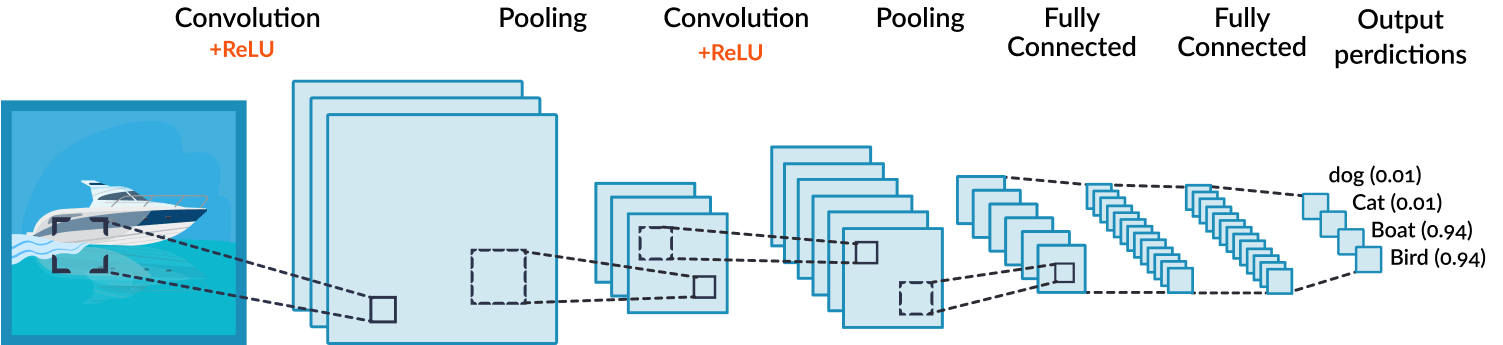
- https://missinglink.ai/wp-content/uploads/2019/07/A-Convolutional-Neural-Network.png

- 합성곱 연산도 인공신경망의 일종임. 
- 대신 완전신경망과 달리 하나의 결괏값이 생성될 때 필터가 지나가는 부분만 연산이 이루어진다는 점과 하나의 이미지에 같은 필터를 연달아 적용하기 떄문에 가중치가 공유되어 기본 완전연결신경망보다 학습 대상이 되는 변수가 적어진다는 특징이 있음
- 그리고 비선형성을 추가해야하기 떄문에 ReLU와 같은 활성화 함수가 필요함

- ReLU : 주로 사용하는 렐루에는 크게 세 가지가 있음
    - 1) 기본 ReLU : f(x) = max(0, x)
        - 특징 : 입력으로 들어온 값을 그대로 전달해주기 때문에 전파되는 값이 크고 역전파 값들 역시 미분이 1로 기울기 값이 그대로 전파되므로 학습속도가 빠름
        - 그리고, 시그모이드나 하이퍼볼릭탄젠트의 경우 지수연산이 필요하지만, 렐루는 별도의 연산이 없어서 빠르다는 장점이 있음
        - 하지만, 어느 순간 큰 손실이 발생하여 가중치와 편차가 마이너스로 떨어지면, 어떤 값이 들어와도 activation값이 0이되는 **다잉뉴런**현상이 발생함
            - ex) 업데이트된 가중치와 편차가 -5, -3이고 모든 입력값이 -1 ~ 1사이로 정규화 된다면 가지게 된다면 어떤 값이 들어와도 결과값이 0보다 작게 됨. 즉, 그 뉴런은 영영 업데이트 되지 않게 됨
        - 이러한 문제를 해결하기 위한 렐루의 변형 형태가 LeakyReLU, RandomLeakyReLU등이 있음
    - 2) Leaky Relu : f(x) = max(ax, x)
        - 상수 a에 작은 값을 설정하여 0 이하의 자극이 들어왔을 때도 활성화 값이 전달되게 함
    - 3) Random Learky Relu : f(x) = max(ax, x)
        - 식 자체는 2)와 같지만, 하이퍼파라메터 a의 값을 랜덤하게 지정하는 활성화 함수